In [1]:
import pandas as pd

import dataframe from pickle file

In [2]:
df = pd.read_pickle('data/model/data.pkl')

In [3]:
df.head()

,text,article_type,embedding_vector
0,Summary of data publicly reported by the Cente...,1,"[0.005152532, 0.0041832207, 0.0013592248, 0.02..."
1,"On May 11, 2023, the United States ended the P...",1,"[-0.004177533, -0.009758532, -0.01115001, 0.03..."
2,Our highly trained specialists are available 2...,1,"[-0.011494388, -0.009370449, 0.008532594, 0.01..."
3,Can we help you find more info? Start by selec...,1,"[-0.0018576796, 0.028474232, -0.013181964, 0.0..."
4,Research – Youth Vaping and Lung Health The Am...,1,"[-0.01785805, 0.0006542458, 0.0037484693, 0.03..."


splitting the dataset into training data and test data

In [4]:
X = df['embedding_vector'].values

In [5]:
X[:3]

array([array([ 0.00515253,  0.00418322,  0.00135922,  0.027955  , -0.00849864,
              -0.00405339,  0.03941876, -0.02183702,  0.04576787,  0.00497942,
              -0.00069394, -0.03106419,  0.00035598, -0.00051818, -0.03868088,
               0.02967701, -0.01859109,  0.03316091, -0.01503784, -0.01721755,
              -0.00106475,  0.0085257 , -0.0084051 ,  0.00519633, -0.00330625,
              -0.02793389, -0.02444155,  0.03002346,  0.00346502, -0.00933107,
              -0.0126805 , -0.04306875, -0.04114606, -0.02166898, -0.02264668,
              -0.00078772,  0.01340858, -0.01125654, -0.00461787,  0.03447867,
               0.02186399,  0.01053821,  0.01956919,  0.01394663, -0.0088659 ,
              -0.03959558,  0.01566608,  0.02022678, -0.04267863, -0.0039938 ,
               0.00487955, -0.01900684, -0.02790596, -0.01832016,  0.00255313,
              -0.01701844, -0.02744398, -0.02458041, -0.01631015, -0.01149102,
              -0.01453607,  0.00620428, -0.00633664,

In [6]:
import numpy as np

# converting nested numpy arras into a nested numpy array
X = np.stack(X)

In [7]:
y = df['article_type']

In [8]:
y.value_counts()

article_type
0    672
1    562
Name: count, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify=df['article_type'])

In [10]:
X_train.shape

(987, 300)

In [11]:
y_train.shape

(987,)

In [12]:
X_test.shape

(247, 300)

In [13]:
y_test.shape

(247,)

looking at the balance between labels of both classes

In [14]:
y_train.value_counts()

article_type
0    537
1    450
Name: count, dtype: int64

In [15]:
y_test.value_counts()

article_type
0    135
1    112
Name: count, dtype: int64

training various ML models

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train, y_train)

y_pred = lg.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.90      0.79       135
           1       0.82      0.54      0.66       112

    accuracy                           0.74       247
   macro avg       0.76      0.72      0.72       247
weighted avg       0.76      0.74      0.73       247



In [18]:
# to check for overfitting
print(classification_report(y_train, lg.predict(X_train)))

              precision    recall  f1-score   support

           0       0.74      0.86      0.80       537
           1       0.80      0.64      0.71       450

    accuracy                           0.76       987
   macro avg       0.77      0.75      0.76       987
weighted avg       0.77      0.76      0.76       987



In [20]:
from sklearn.model_selection import cross_val_score

cv_score_lg = cross_val_score(lg, X, y, cv=5)

In [21]:
print(cv_score_lg)
print(f'Mean accuracy: {np.mean(cv_score_lg)}')

[0.7611336  0.74898785 0.71659919 0.75708502 0.77642276]
Mean accuracy: 0.7520456864487672


<h5>Support Vector Machine</h5>

In [22]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       135
           1       0.87      0.83      0.85       112

    accuracy                           0.87       247
   macro avg       0.87      0.86      0.86       247
weighted avg       0.87      0.87      0.87       247



In [23]:
# to check for overfitting
print(classification_report(y_train, svc.predict(X_train)))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       537
           1       0.86      0.92      0.89       450

    accuracy                           0.90       987
   macro avg       0.90      0.90      0.90       987
weighted avg       0.90      0.90      0.90       987



In [25]:
cv_score_svc = cross_val_score(svc, X, y, cv=5)

In [26]:
print(cv_score_svc)
print(f'Mean accuracy: {np.mean(cv_score_svc)}')

[0.79352227 0.82591093 0.82186235 0.85425101 0.88211382]
Mean accuracy: 0.8355320759685331


K-Nearest Neighbors

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       146
           1       0.78      0.86      0.82       101

    accuracy                           0.84       247
   macro avg       0.84      0.85      0.84       247
weighted avg       0.85      0.84      0.84       247



In [29]:
# to check for overfitting
print(classification_report(y_train, knn.predict(X_train)))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       537
           1       0.87      0.86      0.87       450

    accuracy                           0.88       987
   macro avg       0.88      0.88      0.88       987
weighted avg       0.88      0.88      0.88       987



In [30]:
cv_score_knn = cross_val_score(knn, X, y, cv=5)

In [31]:
print(cv_score_knn)
print(f'Mean accuracy: {np.mean(cv_score_knn)}')

[0.80161943 0.80566802 0.78137652 0.83805668 0.84146341]
Mean accuracy: 0.8136368124814852


<h5>Linear Discriminant Analysis</h5>

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       127
           1       0.87      0.81      0.84       120

    accuracy                           0.85       247
   macro avg       0.85      0.85      0.85       247
weighted avg       0.85      0.85      0.85       247



In [34]:
# to check for overfitting
print(classification_report(y_train, lda.predict(X_train)))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       537
           1       0.93      0.95      0.94       450

    accuracy                           0.95       987
   macro avg       0.94      0.95      0.94       987
weighted avg       0.95      0.95      0.95       987



In [35]:
cv_score_lda = cross_val_score(lda, X, y, cv=5)

In [36]:
print(cv_score_lda)
print(f'Mean accuracy: {np.mean(cv_score_lda)}')

[0.76923077 0.8340081  0.81781377 0.85425101 0.82520325]
Mean accuracy: 0.8201013791514434


<h5>Naive Bayes</h5>

In [37]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.66      0.75      0.70       119
           1       0.73      0.64      0.68       128

    accuracy                           0.69       247
   macro avg       0.70      0.69      0.69       247
weighted avg       0.70      0.69      0.69       247



In [38]:
# to check for overfitting
print(classification_report(y_train, nb.predict(X_train)))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73       537
           1       0.67      0.80      0.73       450

    accuracy                           0.73       987
   macro avg       0.74      0.74      0.73       987
weighted avg       0.74      0.73      0.73       987



In [39]:
cv_score_nb = cross_val_score(svc, X, y, cv=5)

In [40]:
print(cv_score_nb)
print(f'Mean accuracy: {np.mean(cv_score_nb)}')

[0.79352227 0.82591093 0.82186235 0.85425101 0.88211382]
Mean accuracy: 0.8355320759685331


<h5>Decision Tree Classifier</h5>

In [41]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83       141
           1       0.76      0.80      0.78       106

    accuracy                           0.81       247
   macro avg       0.80      0.81      0.80       247
weighted avg       0.81      0.81      0.81       247



In [42]:
# to check for overfitting
print(classification_report(y_train, dt.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       1.00      1.00      1.00       450

    accuracy                           1.00       987
   macro avg       1.00      1.00      1.00       987
weighted avg       1.00      1.00      1.00       987



In [45]:
cv_score_dt = cross_val_score(dt, X, y, cv=5)

In [46]:
print(cv_score_dt)
print(f'Mean accuracy: {np.mean(cv_score_dt)}')

[0.64777328 0.72064777 0.74898785 0.75708502 0.76829268]
Mean accuracy: 0.728557322010467


plotting a confusion matrix for the best model

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

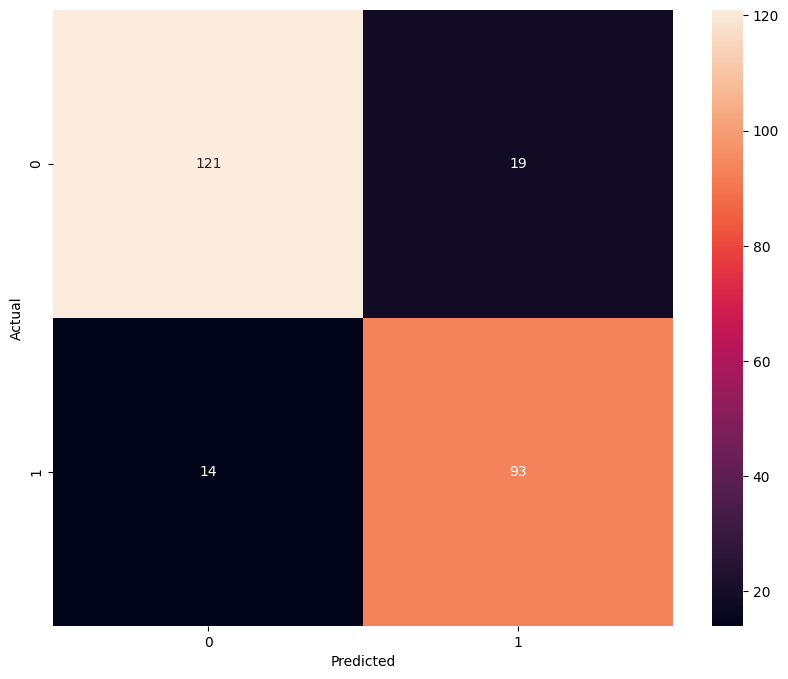

In [44]:
# compute confusion matrix
cm = confusion_matrix(svc.predict(X_test), y_test)

# plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

export best model to ``src/`` for website

In [31]:
import pickle

with open('src/model.pkl', 'wb') as file:
    pickle.dump(svc, file)